In [8]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

import nengo
from nengo.utils.matplotlib import rasterplot
from nengo.dists import Uniform
from nengo.processes import WhiteSignal
from nengo.processes import Piecewise

In [86]:
def aligned(n_neurons, radius=0.9):
    intercepts = np.linspace(-radius, radius, n_neurons)  # even spaced from -.9 to .9
    encoders = np.tile(
        [[1], [-1]], (n_neurons // 2, 1)
    )  # half care about negative, half positive
    intercepts *= encoders[:, 0]
    return intercepts, encoders


intercepts, encoders = aligned(100)  # Makes evenly spaced intercepts


def aligned2D(n_neurons, radius=0.9):
    intercepts2D = np.linspace(-radius, radius, n_neurons)  # even spaced from -.9 to .9
    encoders2D = np.tile(
        [[1], [-1]], (n_neurons // 2, 1)
    )  # half care about negative, half positive
    intercepts2D *= encoders2D[:, 0]
    return intercepts2D, encoders2D


intercepts2D, encoders2D = aligned(200)  # Makes evenly spaced intercepts

# Create the model object
model = nengo.Network(label="Multiplication")
with model:

    # Create a piecewise step function for input A
    input_A = nengo.Node(Piecewise({0: -5, 1: -2, 2: 3, 3: 5, 4: -2}))

    # Create a piecewise step function for input B
    input_B = nengo.Node(Piecewise({0: -5, 1: -2, 2: 3, 3: 5, 4: -2}))

    output = nengo.Node(size_in=1)
    correct_ans = Piecewise({0: 5, 1: 1, 2: 3, 3: 7, 4: 1})

    # Create 5 ensembles of leaky integrate-and-fire neurons for input A
    A = nengo.Ensemble(
        100,
        dimensions=1,
        radius=5,
        intercepts=intercepts,
        max_rates=Uniform(100, 100),
        encoders=encoders,
    )
    A1 = nengo.Ensemble(
        100,
        dimensions=1,
        radius=5,
        intercepts=intercepts,
        max_rates=Uniform(100, 100),
        encoders=encoders,
    )
    A2 = nengo.Ensemble(
        100,
        dimensions=1,
        radius=5,
        intercepts=intercepts,
        max_rates=Uniform(100, 100),
        encoders=encoders,
    )

    # Create 5 ensembles of leaky integrate-and-fire neurons for input B
    B = nengo.Ensemble(
        100,
        dimensions=1,
        radius=5,
        intercepts=intercepts,
        max_rates=Uniform(100, 100),
        encoders=encoders,
    )
    B1 = nengo.Ensemble(
        100,
        dimensions=1,
        radius=5,
        intercepts=intercepts,
        max_rates=Uniform(100, 100),
        encoders=encoders,
    )
    B2 = nengo.Ensemble(
        100,
        dimensions=1,
        radius=5,
        intercepts=intercepts,
        max_rates=Uniform(100, 100),
        encoders=encoders,
    )

    # Connect the input nodes to the appropriate ensembles
    nengo.Connection(input_A, A)
    nengo.Connection(input_B, B)

    # Connect input ensembles A and B to the 2D combined ensemble
    combined = nengo.Ensemble(
        200,
        dimensions=2,
        radius=5,
        intercepts=intercepts2D,
        max_rates=Uniform(100, 100),
    )

    # Define functions for computations
    def relu(x):
        return max(0.0, x)

    def minus(x):
        return -1 * x

    def absolute(x):
        return abs(x)

    def funct(x):
        return 2 * x - 5

    def norm(x):
        return nengo.utils.numpy.norm(x)

    # Connect the combined ensemble to the output ensemble
    nengo.Connection(A, A1, function=relu)
    nengo.Connection(A1, A2, function=minus)
    nengo.Connection(B, B1, function=absolute)
    nengo.Connection(B1, B2, function=funct)

    # Combine the outputs of A2 and B2
    nengo.Connection(A2, combined[0])
    nengo.Connection(B2, combined[1])

    # Connect the combined ensemble to the output node with normalization
    nengo.Connection(combined, output, function=norm)

    # Probes
    input_probe = nengo.Probe(input_A)
    A_probe = nengo.Probe(A, synapse=0.02)
    A1_probe = nengo.Probe(A1, synapse=0.05)
    A2_probe = nengo.Probe(A2, synapse=0.01)
    B1_probe = nengo.Probe(B1, synapse=0.05)
    B2_probe = nengo.Probe(B2, synapse=0.05)
    output_probe = nengo.Probe(output, synapse=0.03)


# Create the simulator
with nengo.Simulator(model) as sim:
    # Run it for 5 seconds
    sim.run(5)

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

(-10.1, 10.1)

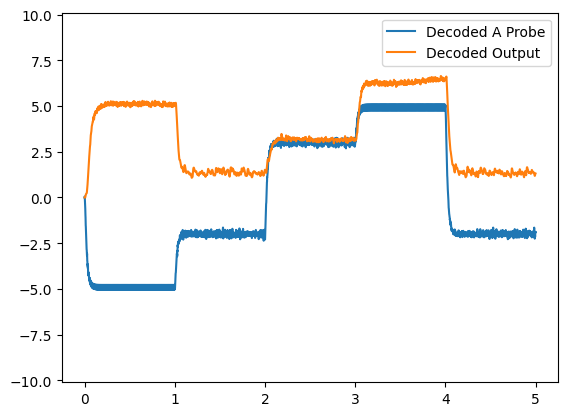

In [88]:
# Plot the input signals and decoded ensemble values
plt.figure()
# plt.plot(sim.trange(), sim.data[input_probe], label="Input")
plt.plot(sim.trange(), sim.data[A_probe], label="Decoded A Probe")
plt.plot(sim.trange(), sim.data[output_probe], label="Decoded Output")
# plt.plot(
#    sim.trange(), correct_ans.run(sim.time, dt=sim.dt), c="k", label="Correct Answer"
# )
plt.legend(loc="best")
plt.ylim(-10.1, 10.1)